In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc, precision_recall_curve, average_precision_score
)
from sklearn.pipeline import Pipeline

# Setting default style
sns.set(style="whitegrid")


In [20]:
# Ganti path dengan lokasi file datasetmu
df = pd.read_csv('dataset.csv', delimiter=',')
df.head()


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


## 1. Exploratory Data Analysis (EDA)


In [21]:
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())

print("\nMissing values:")
print(df.isnull().sum())

df.describe(include="all")


Shape: (27901, 18)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
count,27901.000000,27901,27901.000000,27901,27901,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901,27901,27901,27901,27901.000000,27901,27901,27901.000000
unique,NaN,2,NaN,52,14,NaN,NaN,NaN,NaN,NaN,5,4,28,2,NaN,6,2,NaN
top,NaN,Male,NaN,Kalyan,Student,NaN,NaN,NaN,NaN,NaN,'Less than 5 hours',Unhealthy,'Class 12',Yes,NaN,5.0,No,NaN
freq,NaN,15547,NaN,1570,27870,NaN,NaN,NaN,NaN,NaN,8310,10317,6080,17656,NaN,6715,14398,NaN
mean,70442.149421,NaN,25.822300,NaN,NaN,3.141214,0.000430,7.656104,2.943837,0.000681,NaN,NaN,NaN,NaN,7.156984,NaN,NaN,0.585499
std,40641.175216,NaN,4.905687,NaN,NaN,1.381465,0.043992,1.470707,1.361148,0.044394,NaN,NaN,NaN,NaN,3.707642,NaN,NaN,0.492645
min,2.000000,NaN,18.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000
25%,35039.000000,NaN,21.000000,NaN,NaN,2.000000,0.000000,6.290000,2.000000,0.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,0.000000
50%,70684.000000,NaN,25.000000,NaN,NaN,3.000000,0.000000,7.770000,3.000000,0.000000,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,1.000000
75%,105818.000000,NaN,30.000000,NaN,NaN,4.000000,0.000000,8.920000,4.000000,0.000000,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,1.000000


## 2. Data Preprocessing


In [22]:
# Asumsikan kolom target adalah kolom terakhir
target_col = df.columns[-1]

y = df[target_col]
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)
else:
    y = y.values

X = df.drop(columns=[target_col])
X = pd.get_dummies(X, drop_first=True)

print("Feature shape:", X.shape)
print("Target shape:", y.shape)


Feature shape: (27901, 114)
Target shape: (27901,)


## 3. Train-Test Split


In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train size:", X_train.shape, "Test size:", X_test.shape)


Train size: (22320, 114) Test size: (5581, 114)


## 4. Model Training with SVM + GridSearchCV


In [24]:
import pickle
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Pastikan X_train dan y_train sudah ada dari sel sebelumnya

print("Memulai proses training (versi cepat)...")

# Definisikan pipeline Anda
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(probability=True))
])

# Definisikan distribusi parameter untuk pencarian acak
param_dist = {
    "svm__C": uniform(0.1, 10),
    "svm__kernel": ["rbf"],
    "svm__gamma": ["scale", "auto"]
}

# Inisialisasi RandomizedSearchCV
random_search = RandomizedSearchCV(
    pipeline,
    param_dist,
    n_iter=5,  # Anda bisa menaikkan ini (misal: 20) jika punya waktu lebih
    cv=3,
    n_jobs=-1,
    scoring="accuracy",
    random_state=42
)

# Latih model
random_search.fit(X_train, y_train)

print("✅ Training Selesai!")
print("Parameter Terbaik:", random_search.best_params_)

# Ambil model terbaik
best_model = random_search.best_estimator_

# SEKARANG, SIMPAN MODEL TERBAIK INI
with open('svm_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("✅ Model terbaik berhasil disimpan ke 'svm_model.pkl'!")

Memulai proses training (versi cepat)...
✅ Training Selesai!
Parameter Terbaik: {'svm__C': np.float64(0.6808361216819946), 'svm__gamma': 'auto', 'svm__kernel': 'rbf'}
✅ Model terbaik berhasil disimpan ke 'svm_model.pkl'!


## 5. Model Evaluation


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      2313
           1       0.85      0.88      0.87      3268

    accuracy                           0.84      5581
   macro avg       0.84      0.83      0.84      5581
weighted avg       0.84      0.84      0.84      5581



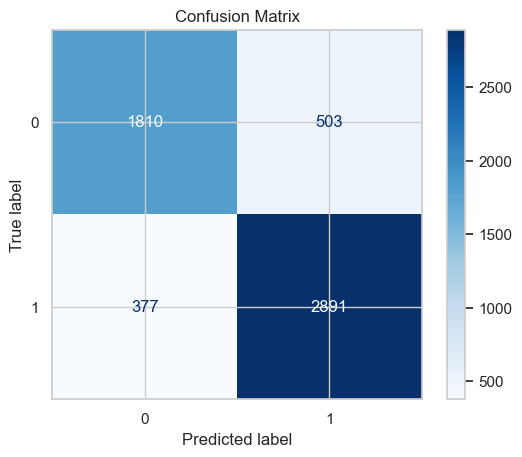

In [25]:
# Ambil model terbaik dari RandomizedSearch
best_model = random_search.best_estimator_

# Prediksi
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Evaluasi
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


## ROC Curve & Precision-Recall Curve


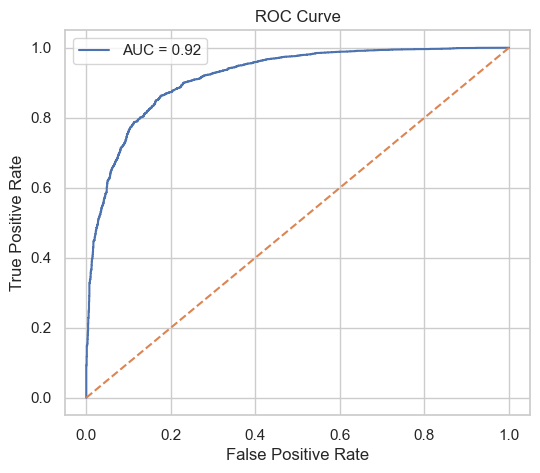

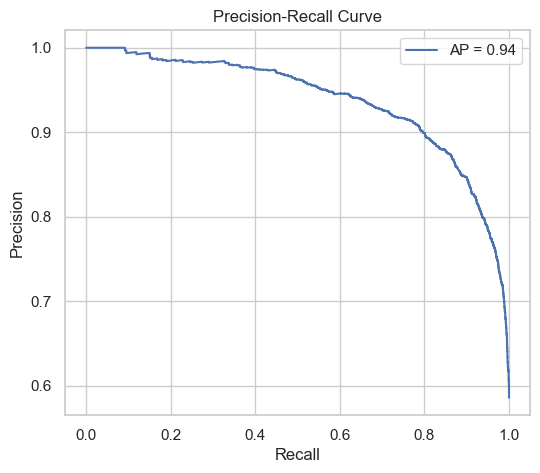

In [26]:
if len(np.unique(y)) == 2:
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0,1],[0,1],"--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    avg_precision = average_precision_score(y_test, y_proba)

    plt.figure(figsize=(6,5))
    plt.plot(recall, precision, label=f"AP = {avg_precision:.2f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()
    plt.show()
